## Homework #2: Analyze Surface Energy Balance

#### Download the ERA5 Surface Heat Fluxes

You can download the four data files from the links below

*(Note: I have regridded the original ERA5 data from 0.25°×0.25° to a coarser 1°×1° grid.)*

- [era5.msshf.194001-202212_regrid_1deg.nc](https://drive.google.com/file/d/1-aS9A-1tAk9MBrNwt5cEN5oo4HlVggb6/view?usp=drive_link)  
- [era5.mslhf.194001-202212_regrid_1deg.nc](https://drive.google.com/file/d/1fk74qv47jcCvuCAMSuuilX2hbMqz8sNe/view?usp=drive_link)  
- [era5.msnlwrf.194001-202212_regrid_1deg.nc](https://drive.google.com/file/d/11sS7PrP1NxjO9pnFBXIbNo-SkutceAqN/view?usp=drive_link)  
- [era5.msnswrf.194001-202212_regrid_1deg.nc](https://drive.google.com/file/d/18AFYNvGfQSx_PjPf5fb2wFmPil1BnxrL/view?usp=drive_link)  

#### Instructions After Download

1. Move all files into your **course working directory**.  
2. Work through this notebook on your own.  
3. Complete **Questions 1–3** to earn the full **10 points** for Homework #2.

In [1]:
# Import Python libraries for data analysis, plotting, and mapping
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [2]:
#print working directory; Equivalent to running pwd in a terminal.
! pwd

/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course


### Loading Dataset

- **msnswrf**: Net surface shortwave radiation (positive values indicate downward flux)  
- **msnlwrf**: Net surface longwave radiation (positive values indicate downward flux)  
- **mslhf**: Net surface latent heat flux (positive values indicate downward flux)  
- **msshf**: Net surface sensible heat flux (positive values indicate downward flux)  


In [3]:
# Define and open a NetCDF dataset using xarray
#surface net shortwave flux
ds_sw = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/era5.msnswrf.194001-202212_regrid_1deg.nc")
#surface net longwave flux
ds_lw = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/era5.msnlwrf.194001-202212_regrid_1deg.nc")
#surface latent heat flux
ds_le = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/era5.mslhf.194001-202212_regrid_1deg.nc")
#surface sensible heat flux
ds_sh = xr.open_dataset("/Users/xianwu/Documents/python/teaching/Phy_Clim_Sci_Course/data/era5.msshf.194001-202212_regrid_1deg.nc")

In [4]:
#show information about this dataset; Some original information is missing as I have regridded the original data
ds_sw

<xarray.Dataset> Size: 220MB
Dimensions:  (time: 996, lat: 192, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2022-12-01
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    msnswrf  (time, lat, lon) float32 220MB ...
Attributes:
    regrid_method:  conservative

In [5]:
# Extract the flux variable
sw = ds_sw['msnswrf'].sel(time=slice("1940-01-01", "2022-12-31"))
lw = ds_lw['msnlwrf'].sel(time=slice("1940-01-01", "2022-12-31"))
le = ds_le['mslhf'].sel(time=slice("1940-01-01", "2022-12-31"))
sh = ds_sh['msshf'].sel(time=slice("1940-01-01", "2022-12-31"))

In [6]:
#Net surface heat flux, positive downward
Qnet = sw+lw+le+sh
Qnet

<xarray.DataArray (time: 996, lat: 192, lon: 288)> Size: 220MB
array([[[  0.7634523 ,   0.76222086,   0.7627903 , ...,   0.76458955,
           0.7628678 ,   0.76400614],
        [  1.8951383 ,   1.8948288 ,   1.9017506 , ...,   1.8855071 ,
           1.8842368 ,   1.8865438 ],
        [  1.9923754 ,   2.0032015 ,   2.0106263 , ...,   1.955359  ,
           1.9718742 ,   1.9822135 ],
        ...,
        [-36.523605  , -36.5456    , -36.569088  , ..., -36.4616    ,
         -36.478504  , -36.504456  ],
        [-32.661777  , -32.683456  , -32.70182   , ..., -32.638428  ,
         -32.646454  , -32.65856   ],
        [-11.033806  , -11.033926  , -11.036028  , ..., -11.030655  ,
         -11.030829  , -11.032384  ]],

       [[ -1.3382595 ,  -1.33835   ,  -1.3387911 , ...,  -1.3364718 ,
          -1.3381872 ,  -1.3374193 ],
        [ -3.7248297 ,  -3.7288961 ,  -3.737092  , ...,  -3.7237787 ,
          -3.7257137 ,  -3.7257776 ],
        [ -3.7758255 ,  -3.7883282 ,  -3.7937317 , ...,  -3.7655106 ,
          -3.7708254 ,  -3.775138  ],
...
         -42.94519   , -43.40451   ],
        [-47.90631   , -47.984913  , -48.06318   , ..., -47.585815  ,
         -47.69399   , -47.804325  ],
        [-17.78953   , -17.80615   , -17.824614  , ..., -17.795563  ,
         -17.790009  , -17.787271  ]],

       [[  2.4644988 ,   2.4636896 ,   2.4621677 , ...,   2.4624815 ,
           2.464459  ,   2.465413  ],
        [  6.681271  ,   6.689243  ,   6.696429  , ...,   6.6332064 ,
           6.653686  ,   6.669574  ],
        [  6.9577303 ,   6.9629707 ,   6.970769  , ...,   6.9232383 ,
           6.9431143 ,   6.9553556 ],
        ...,
        [-57.334305  , -57.517742  , -57.675346  , ..., -57.11654   ,
         -57.150265  , -57.211906  ],
        [-51.220436  , -51.321957  , -51.42782   , ..., -51.09346   ,
         -51.13427   , -51.175957  ],
        [-18.474415  , -18.493624  , -18.518288  , ..., -18.444925  ,
         -18.451134  , -18.462185  ]]],
      shape=(996, 192, 288), dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2022-12-01
  * lat      (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon      (lon) float64 2kB 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

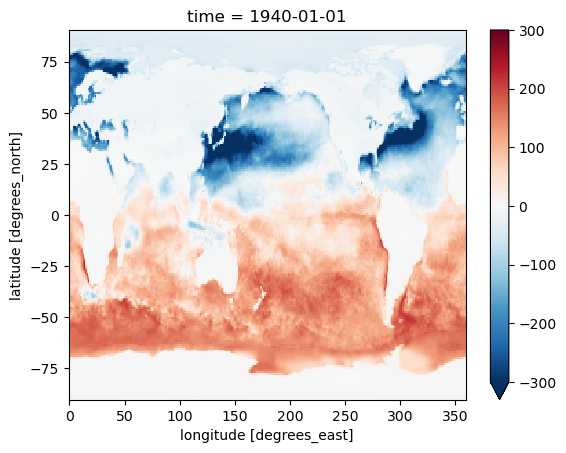

In [7]:
#quick check of Qnet at time=0
Qnet.isel(time=0).plot(vmin=-300, vmax=300, cmap="RdBu_r")

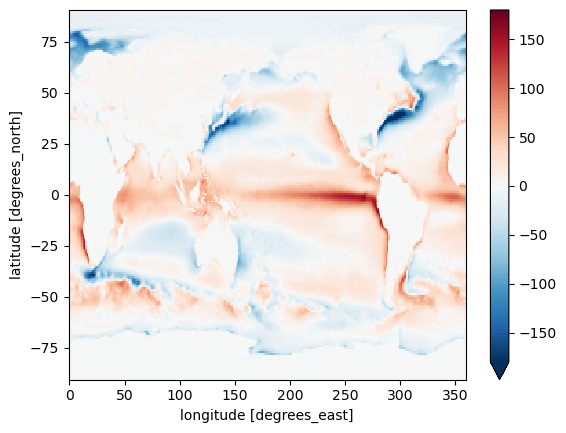

In [8]:
#quick check of time average of Qnet
Qnet.mean(dim='time').plot(vmin=-180, vmax=180, cmap="RdBu_r")

## Example 1: Global Analysis of Annual Mean Heat Fluxes

### 1) Climatology of Global Surface Fluxes (1940–2022)

This includes:  
- **Shortwave radiation (SW)**  
- **Longwave radiation (LW)**  
- **Latent heat flux (LE)**  
- **Sensible heat flux (SH)**  
- **Net surface heat flux (Qnet = SW + LW + LE + SH)**  

In [9]:
# Compute annual mean climatology
annual_mean_Qnet = Qnet.mean(dim='time')
annual_mean_sw = sw.mean(dim='time')
annual_mean_lw = lw.mean(dim='time')
annual_mean_le = le.mean(dim='time')
annual_mean_sh = sh.mean(dim='time')

In [10]:
# Define color limits for each flux individually
def plot_flux(ax, flux, cmap="RdBu_r", vmin=None, vmax=None, contour_interval=None):
    """
    Plot surface heat fluxes on a given axis with contour fill only.
    """
    # Determine levels
    if vmin is not None and vmax is not None and contour_interval is not None:
        levels = np.arange(vmin, vmax + contour_interval, contour_interval)
    else:
        levels = np.arange(-280, 280+20, 20)

    flux_cyclic, lon_cyclic = add_cyclic_point(flux.values, coord=flux.lon)
    mappable = ax.contourf(
        lon_cyclic, flux.lat, flux_cyclic,
        transform=ccrs.PlateCarree(),
        cmap=cmap, levels=levels, extend='both'
    )

    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.tick_params(axis='both', which='major', labelsize=8, length=1)
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_xlabel('')
    ax.set_ylabel('')

    return mappable


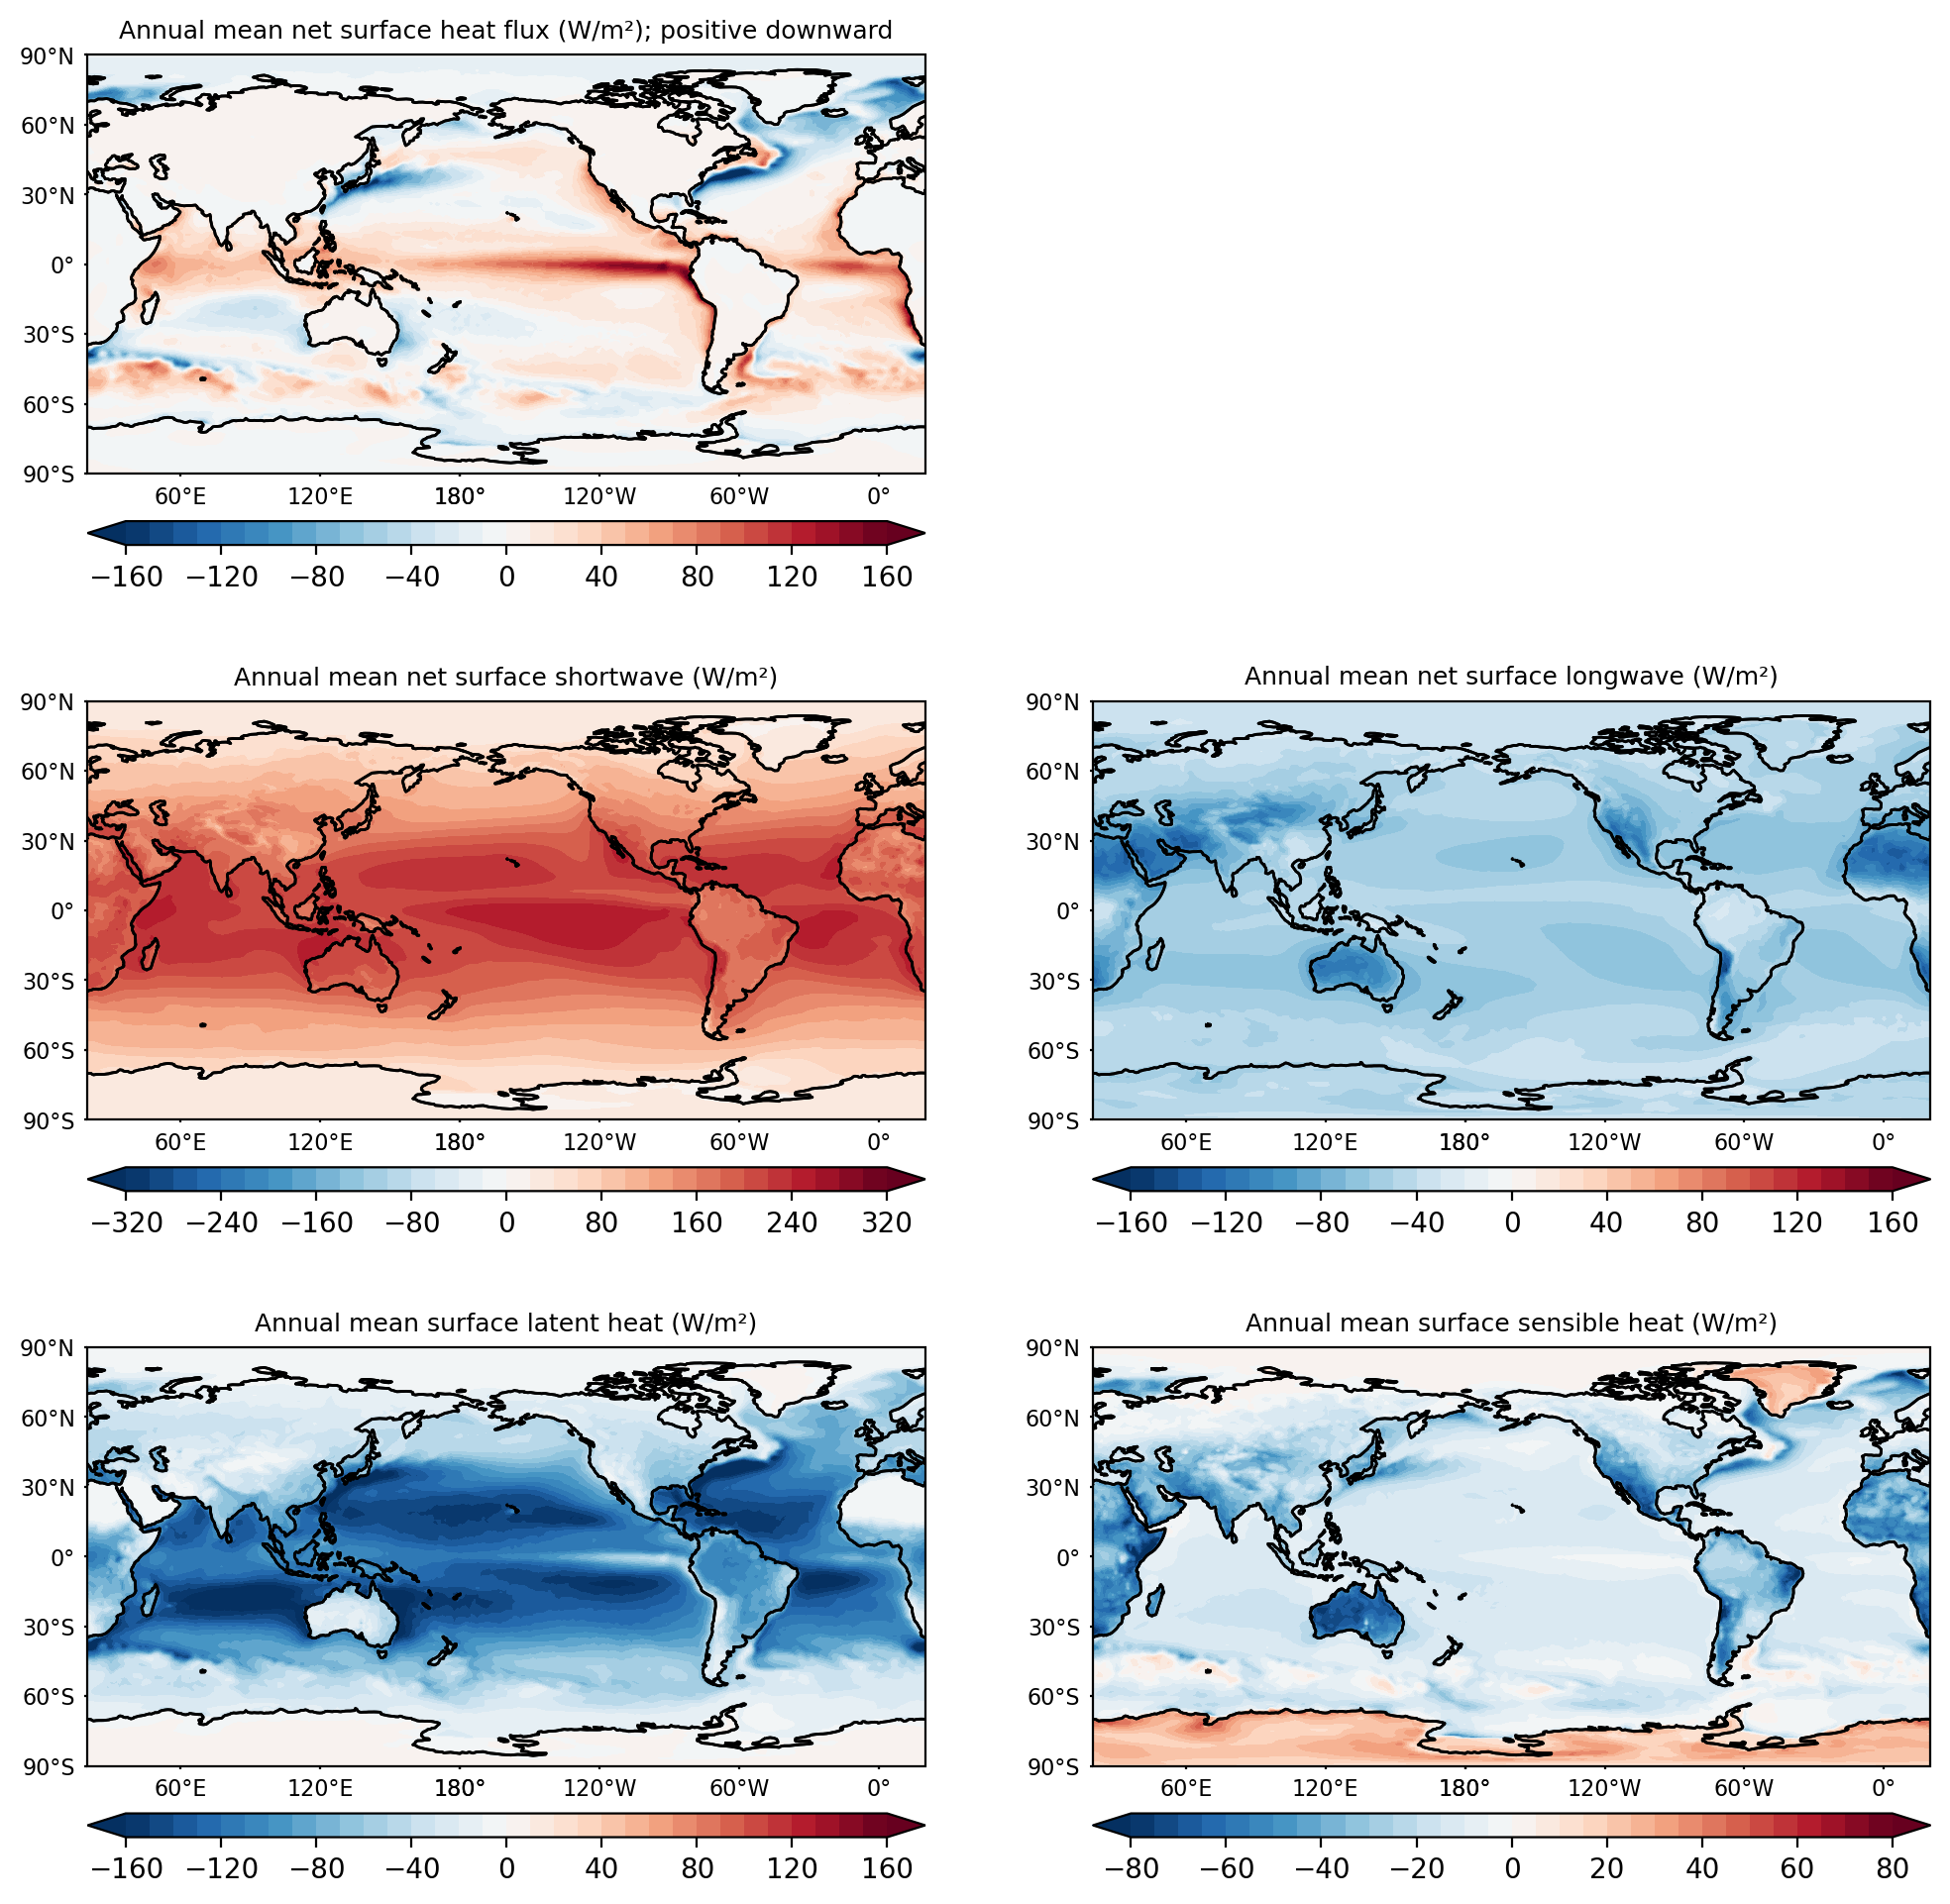

In [11]:
# Define color limits for each flux individually 
flux_limits = {
    "Qnet": (-160, 160, 10),
    "SW":   (-320, 320, 20),  
    "LW":   (-160, 160, 10),   
    "LE":   (-160, 160, 10),
    "SH":   (-80, 80, 5)
}

fig, axes = plt.subplots(
    3, 2, figsize=(12, 12),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160)},
    dpi=200
)

axes_flat = axes.flatten()

# --- First row: Qnet ---
vmin, vmax, interval = flux_limits["Qnet"]
mappable = plot_flux(axes_flat[0], annual_mean_Qnet, vmin=vmin, vmax=vmax, contour_interval=interval)
axes_flat[0].set_title("Annual mean net surface heat flux (W/m²); positive downward", fontsize=9)

# Skip empty subplot
axes_flat[1].axis('off')

# --- Remaining rows: SW, LW, LE, SH ---
other_fluxes = [
    (annual_mean_sw, "SW", "Annual mean net surface shortwave (W/m²)"),
    (annual_mean_lw, "LW", "Annual mean net surface longwave (W/m²)"),
    (annual_mean_le, "LE", "Annual mean surface latent heat (W/m²)"),
    (annual_mean_sh, "SH", "Annual mean surface sensible heat (W/m²)")
]

for ax, (data, key, title) in zip(axes_flat[2:], other_fluxes):
    vmin, vmax, interval = flux_limits[key]
    mappable = plot_flux(ax, data, vmin=vmin, vmax=vmax, contour_interval=interval)
    ax.set_title(title, fontsize=9)

# --- Add horizontal colorbars for each panel ---
for ax, (data, key, title) in zip([axes_flat[0]] + axes_flat[2:].tolist(), 
                                  [(annual_mean_Qnet, "Qnet", "Qnet (W/m²)")] + other_fluxes):
    vmin, vmax, interval = flux_limits[key]
    mappable = plot_flux(ax, data, vmin=vmin, vmax=vmax, contour_interval=interval)
    
    # Position axes below the subplot
    pos = ax.get_position()
    cbar_ax = fig.add_axes([pos.x0, pos.y0 - 0.03, pos.width, 0.01])  # [left, bottom, width, height]
    fig.colorbar(mappable, cax=cbar_ax, orientation='horizontal')

plt.show()


## <span style="color:blue">Q1 (6 points – Interpretation): Describe the surface heat flux.</span>

### Annual Mean Surface Heat Flux Questions (1 point each; 6 points total)

**Q1.1 (1 point) Global Pattern of Surface Qnet**  
- Describe the overall global pattern of net surface heat flux.  
*Hint:* Identify regions of maximum heat gain and maximum heat loss.

**Q1.2 (1 point) Qnet and Surface Air Temperature (T2m)**
- How does the spatial pattern of annual mean net surface heat flux (Qnet) relate to the global climatology of 2-meter air temperature (**T2m in HW#1 Example 1**)?  
*Hint:* Consider whether regions of high T2m correspond to net heat gain or net heat loss at the surface.

**Q1.3 (1 point) Shortwave vs. Longwave**  
- Compare the spatial patterns of surface shortwave and longwave radiation.  
*Hint:* Consider how they combine to affect Qnet.

**Q1.4 (1 point) Latent Heat Loss**  
- Which regions experience the largest heat loss due to latent heat?  
*Hint:* Think about areas with strong evaporation.

**Q1.5 (1 point) Tropical vs. Extratropical Fluxes**  
- How do heat flux components differ between tropical and extratropical regions?  
*Hint:* Identify which component dominates in the tropics.

**Q1.6 (1 point) Ocean vs. Land**  
- Compare the surface heat fluxes over oceans and continents.  
*Hint:* Consider differences in Qnet, latent heat, and sensible heat.

A1.1:

A1.2:

A1.3:

A1.4:

A1.5:

A1.6:

## Example 2: Zonal Mean of Annual Mean Surface Heat Fluxes

### 2) Latitudinal Distribution of Annual Mean Fluxes

- Compute the **zonal average** (longitude mean) for each flux component:  
  - **SW, LW, LE, SH, Qnet**  
- Plot the zonal mean values as line plots against latitude.  

In [12]:
# --- Compute zonal averages ---
zonal_annual_mean_Qnet = annual_mean_Qnet.mean(dim='lon')
zonal_annual_mean_sw   = annual_mean_sw.mean(dim='lon')
zonal_annual_mean_lw   = annual_mean_lw.mean(dim='lon')
zonal_annual_mean_le   = annual_mean_le.mean(dim='lon')
zonal_annual_mean_sh   = annual_mean_sh.mean(dim='lon')

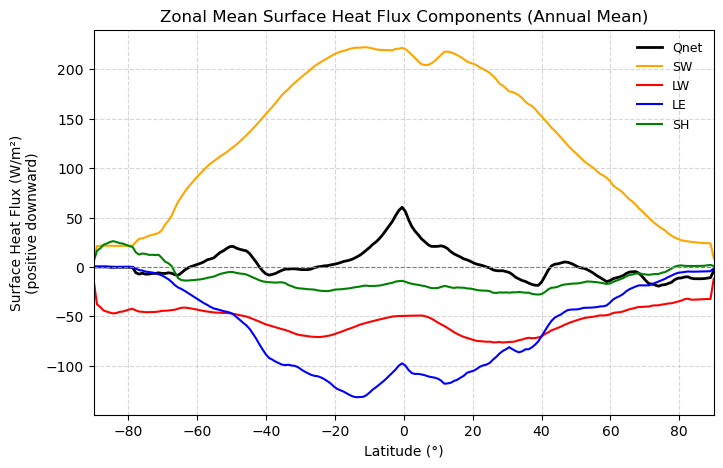

In [13]:
# --- Plot zonal averages ---
plt.figure(figsize=(8, 5), dpi=100)

plt.plot(zonal_annual_mean_Qnet.lat, zonal_annual_mean_Qnet, label="Qnet", color="black", linewidth=2)
plt.plot(zonal_annual_mean_sw.lat,   zonal_annual_mean_sw,   label="SW",   color="orange")
plt.plot(zonal_annual_mean_lw.lat,   zonal_annual_mean_lw,   label="LW",   color="red")
plt.plot(zonal_annual_mean_le.lat,   zonal_annual_mean_le,   label="LE",   color="blue")
plt.plot(zonal_annual_mean_sh.lat,   zonal_annual_mean_sh,   label="SH",   color="green")

plt.axhline(0, color="gray", linewidth=0.8, linestyle="--")

plt.xlabel("Latitude (°)")
plt.ylabel("Surface Heat Flux (W/m²)\n(positive downward)")
plt.xlim(-90, 90) 
plt.title("Zonal Mean Surface Heat Flux Components (Annual Mean)")
plt.legend(frameon=False, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

## <span style="color:blue">Q2 (2 points – Interpretation): Describe the zonal mean surface heat flux.</span>

### Questions (1 point each; total 2 points)

**Q2.1 Latitudinal Variation of Fluxes (1 point)**  
How do the surface heat flux components (SW, LW, LE, SH, Qnet) vary with latitude from the tropics to the poles?  
*Hint:* Look for symmetry around the equator, identify where each flux peaks or declines, and note differences between radiative and turbulent fluxes.  

**Q2.2 Dominant Fluxes and Net Heat Balance (1 point)**  
Which fluxes dominate in the tropics versus high latitudes, and what does the net surface heat flux (Qnet) reveal about energy gain and loss across latitude bands?  
*Hint:* Consider strong solar radiation in low latitudes, turbulent fluxes (LE, SH) in mid/high latitudes, and where Qnet is positive or negative.

A2.1:

A2.2:

## Example 3: Seasonal climatology of surface heat fluxes

###

- Similar to the annual mean analysis in Example 1, but compute the DJF and JJA climatologies

In [14]:
# Compute seasonal mean (spatial) for each flux
djf_mean_Qnet = Qnet.groupby('time.season').mean(dim='time').sel(season='DJF')
jja_mean_Qnet = Qnet.groupby('time.season').mean(dim='time').sel(season='JJA')

djf_mean_sw = sw.groupby('time.season').mean(dim='time').sel(season='DJF')
jja_mean_sw = sw.groupby('time.season').mean(dim='time').sel(season='JJA')

djf_mean_lw = lw.groupby('time.season').mean(dim='time').sel(season='DJF')
jja_mean_lw = lw.groupby('time.season').mean(dim='time').sel(season='JJA')

djf_mean_le = le.groupby('time.season').mean(dim='time').sel(season='DJF')
jja_mean_le = le.groupby('time.season').mean(dim='time').sel(season='JJA')

djf_mean_sh = sh.groupby('time.season').mean(dim='time').sel(season='DJF')
jja_mean_sh = sh.groupby('time.season').mean(dim='time').sel(season='JJA')

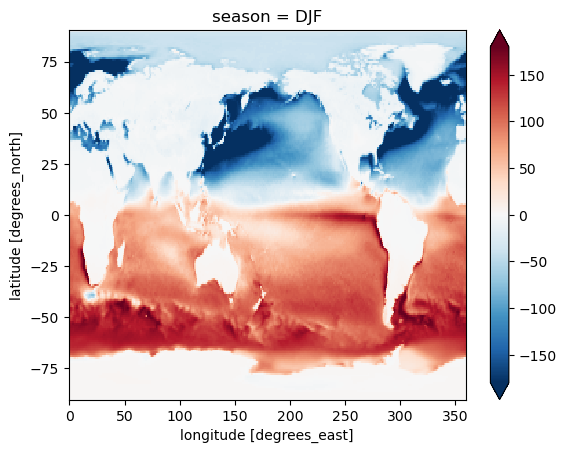

In [15]:
djf_mean_Qnet.plot(vmin=-180, vmax=180, cmap="RdBu_r")

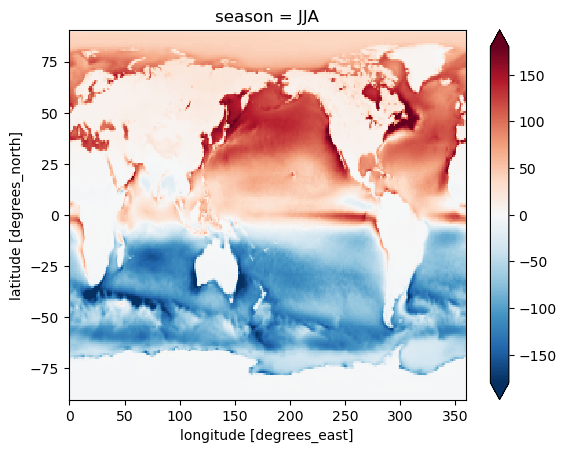

In [16]:
jja_mean_Qnet.plot(vmin=-180, vmax=180, cmap="RdBu_r")

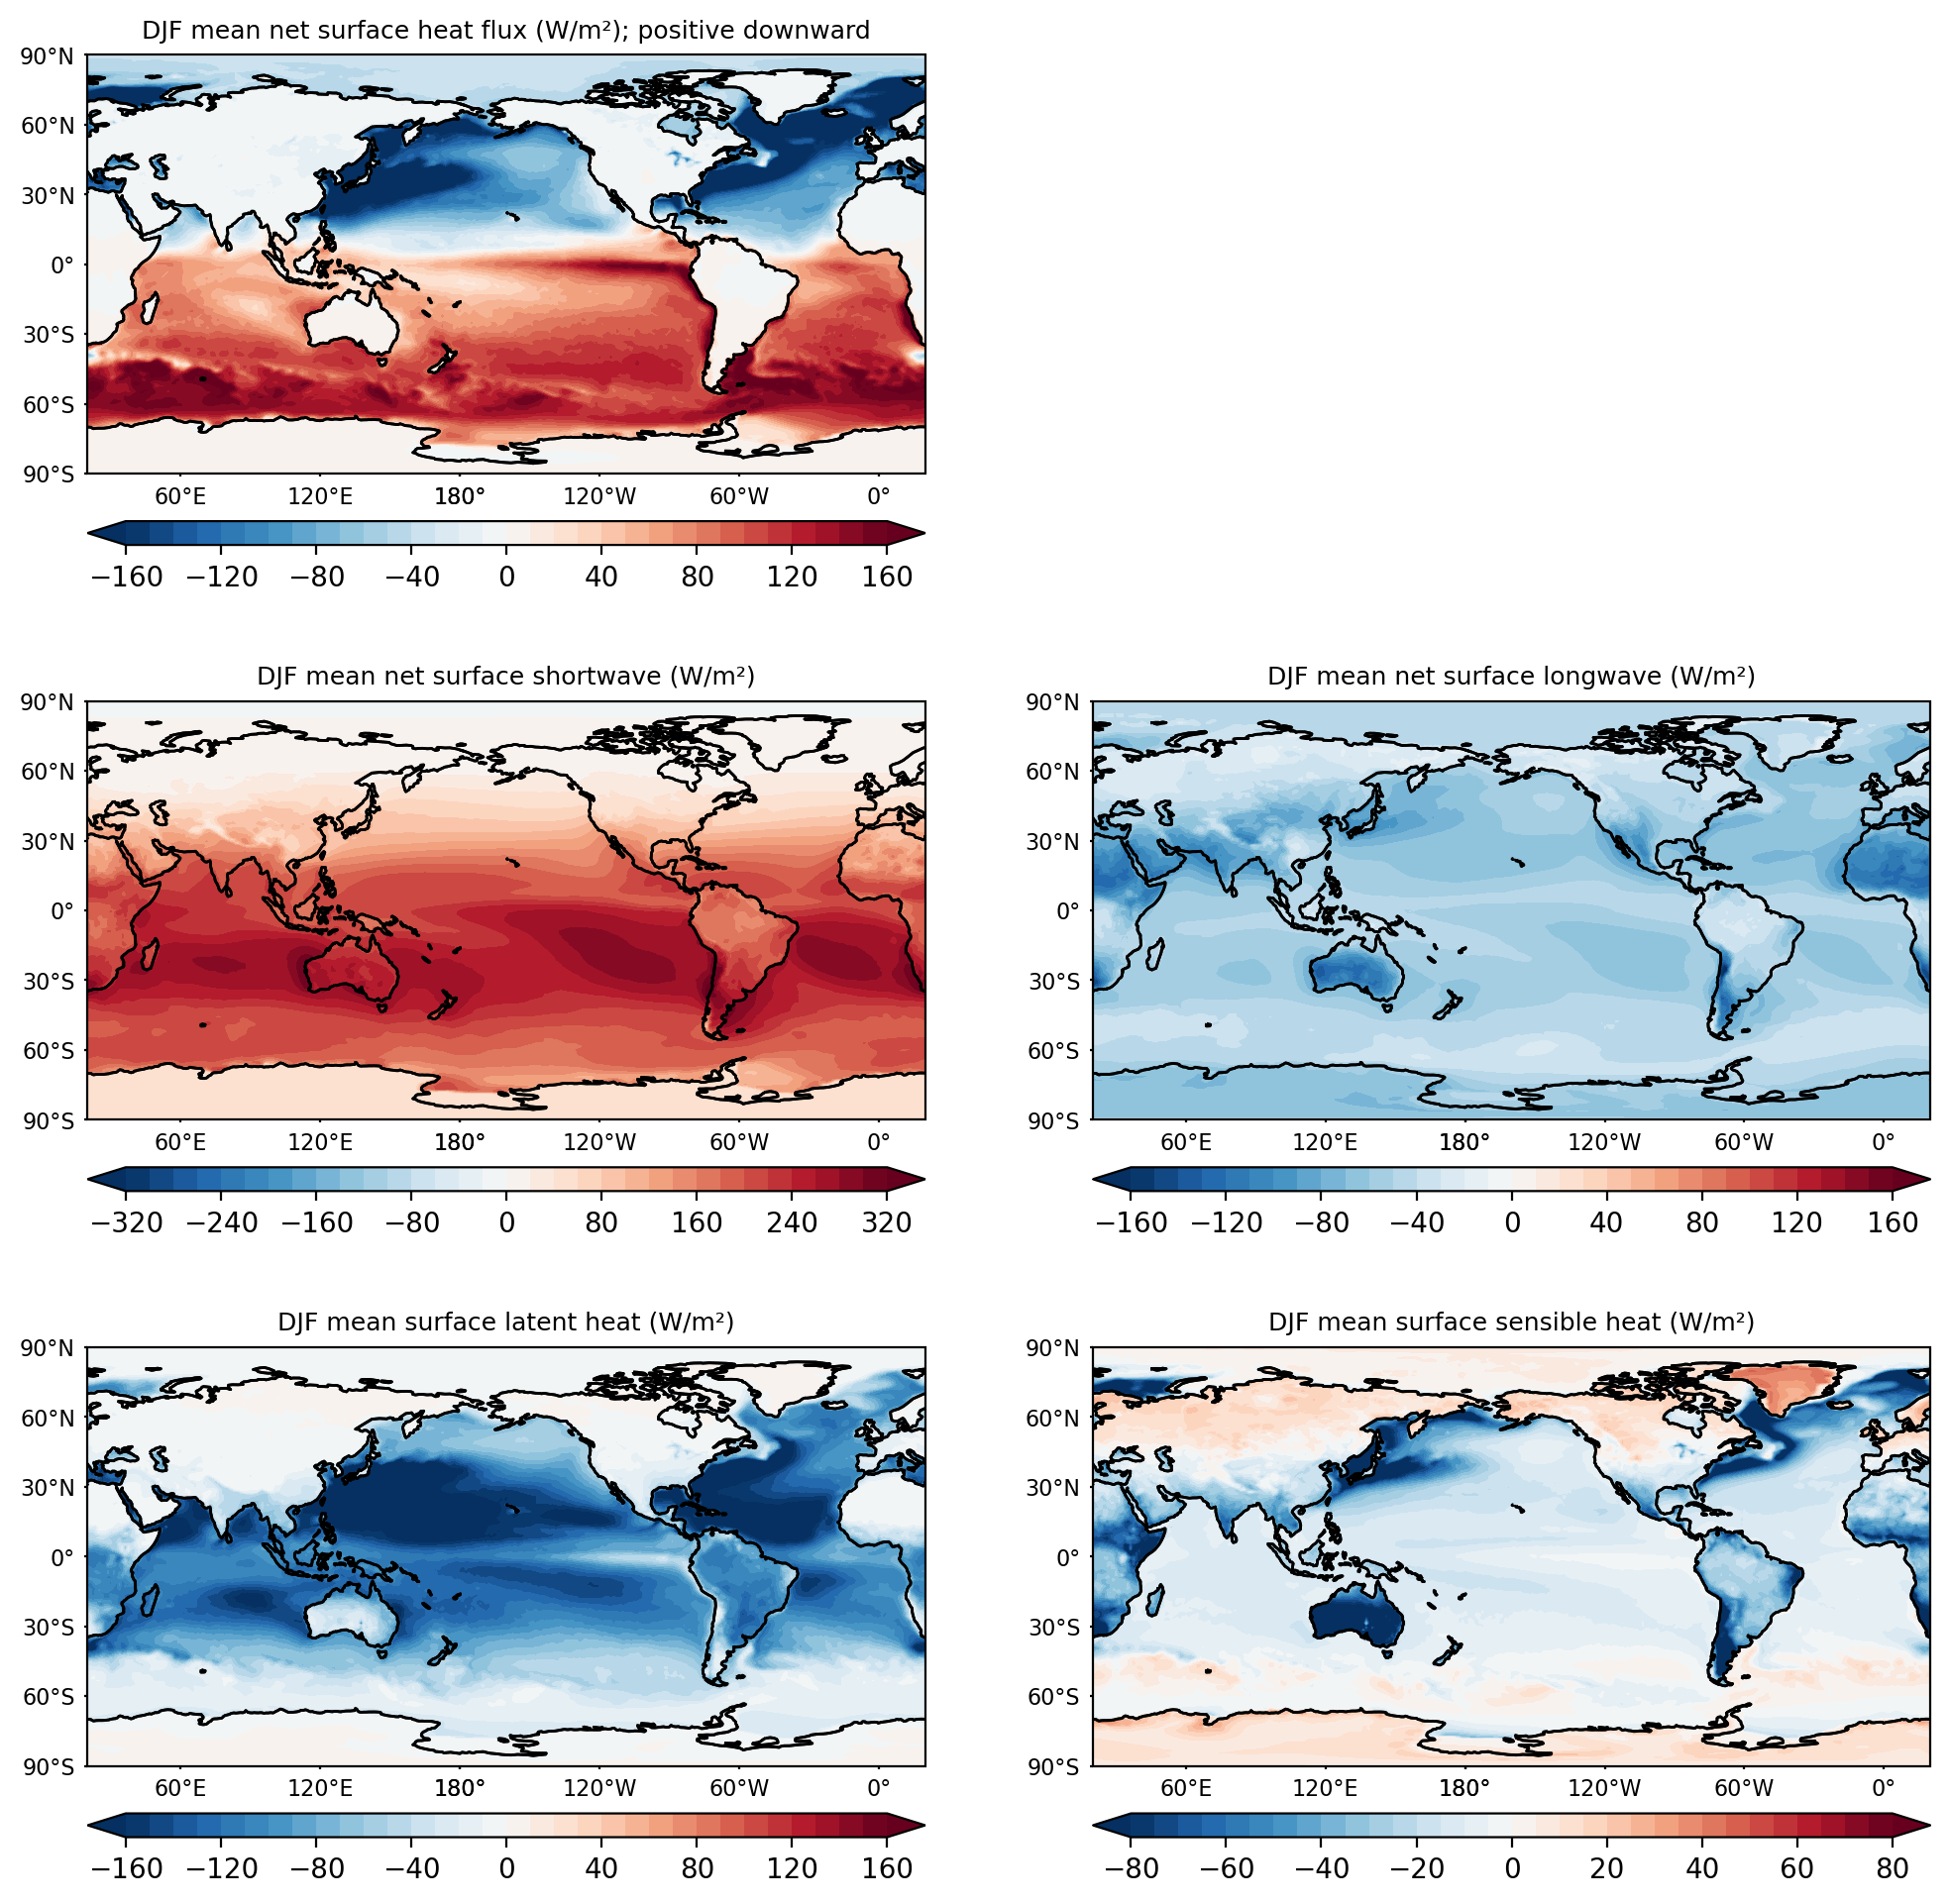

In [17]:
# Define color limits for each flux individually 
flux_limits = {
    "Qnet": (-160, 160, 10),
    "SW":   (-320, 320, 20),  
    "LW":   (-160, 160, 10),   
    "LE":   (-160, 160, 10),
    "SH":   (-80, 80, 5)
}

fig, axes = plt.subplots(
    3, 2, figsize=(12, 12),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160)},
    dpi=200
)

axes_flat = axes.flatten()

# --- First row: Qnet ---
vmin, vmax, interval = flux_limits["Qnet"]
mappable = plot_flux(axes_flat[0], djf_mean_Qnet, vmin=vmin, vmax=vmax, contour_interval=interval)
axes_flat[0].set_title("DJF mean net surface heat flux (W/m²); positive downward", fontsize=9)

# Skip empty subplot
axes_flat[1].axis('off')

# --- Remaining rows: SW, LW, LE, SH ---
other_fluxes = [
    (djf_mean_sw, "SW", "DJF mean net surface shortwave (W/m²)"),
    (djf_mean_lw, "LW", "DJF mean net surface longwave (W/m²)"),
    (djf_mean_le, "LE", "DJF mean surface latent heat (W/m²)"),
    (djf_mean_sh, "SH", "DJF mean surface sensible heat (W/m²)")
]

for ax, (data, key, title) in zip(axes_flat[2:], other_fluxes):
    vmin, vmax, interval = flux_limits[key]
    mappable = plot_flux(ax, data, vmin=vmin, vmax=vmax, contour_interval=interval)
    ax.set_title(title, fontsize=9)

# --- Add horizontal colorbars for each panel ---
for ax, (data, key, title) in zip([axes_flat[0]] + axes_flat[2:].tolist(), 
                                  [(djf_mean_Qnet, "Qnet", "Qnet (W/m²)")] + other_fluxes):
    vmin, vmax, interval = flux_limits[key]
    mappable = plot_flux(ax, data, vmin=vmin, vmax=vmax, contour_interval=interval)
    
    # Position axes below the subplot
    pos = ax.get_position()
    cbar_ax = fig.add_axes([pos.x0, pos.y0 - 0.03, pos.width, 0.01])  # [left, bottom, width, height]
    fig.colorbar(mappable, cax=cbar_ax, orientation='horizontal')

plt.show()


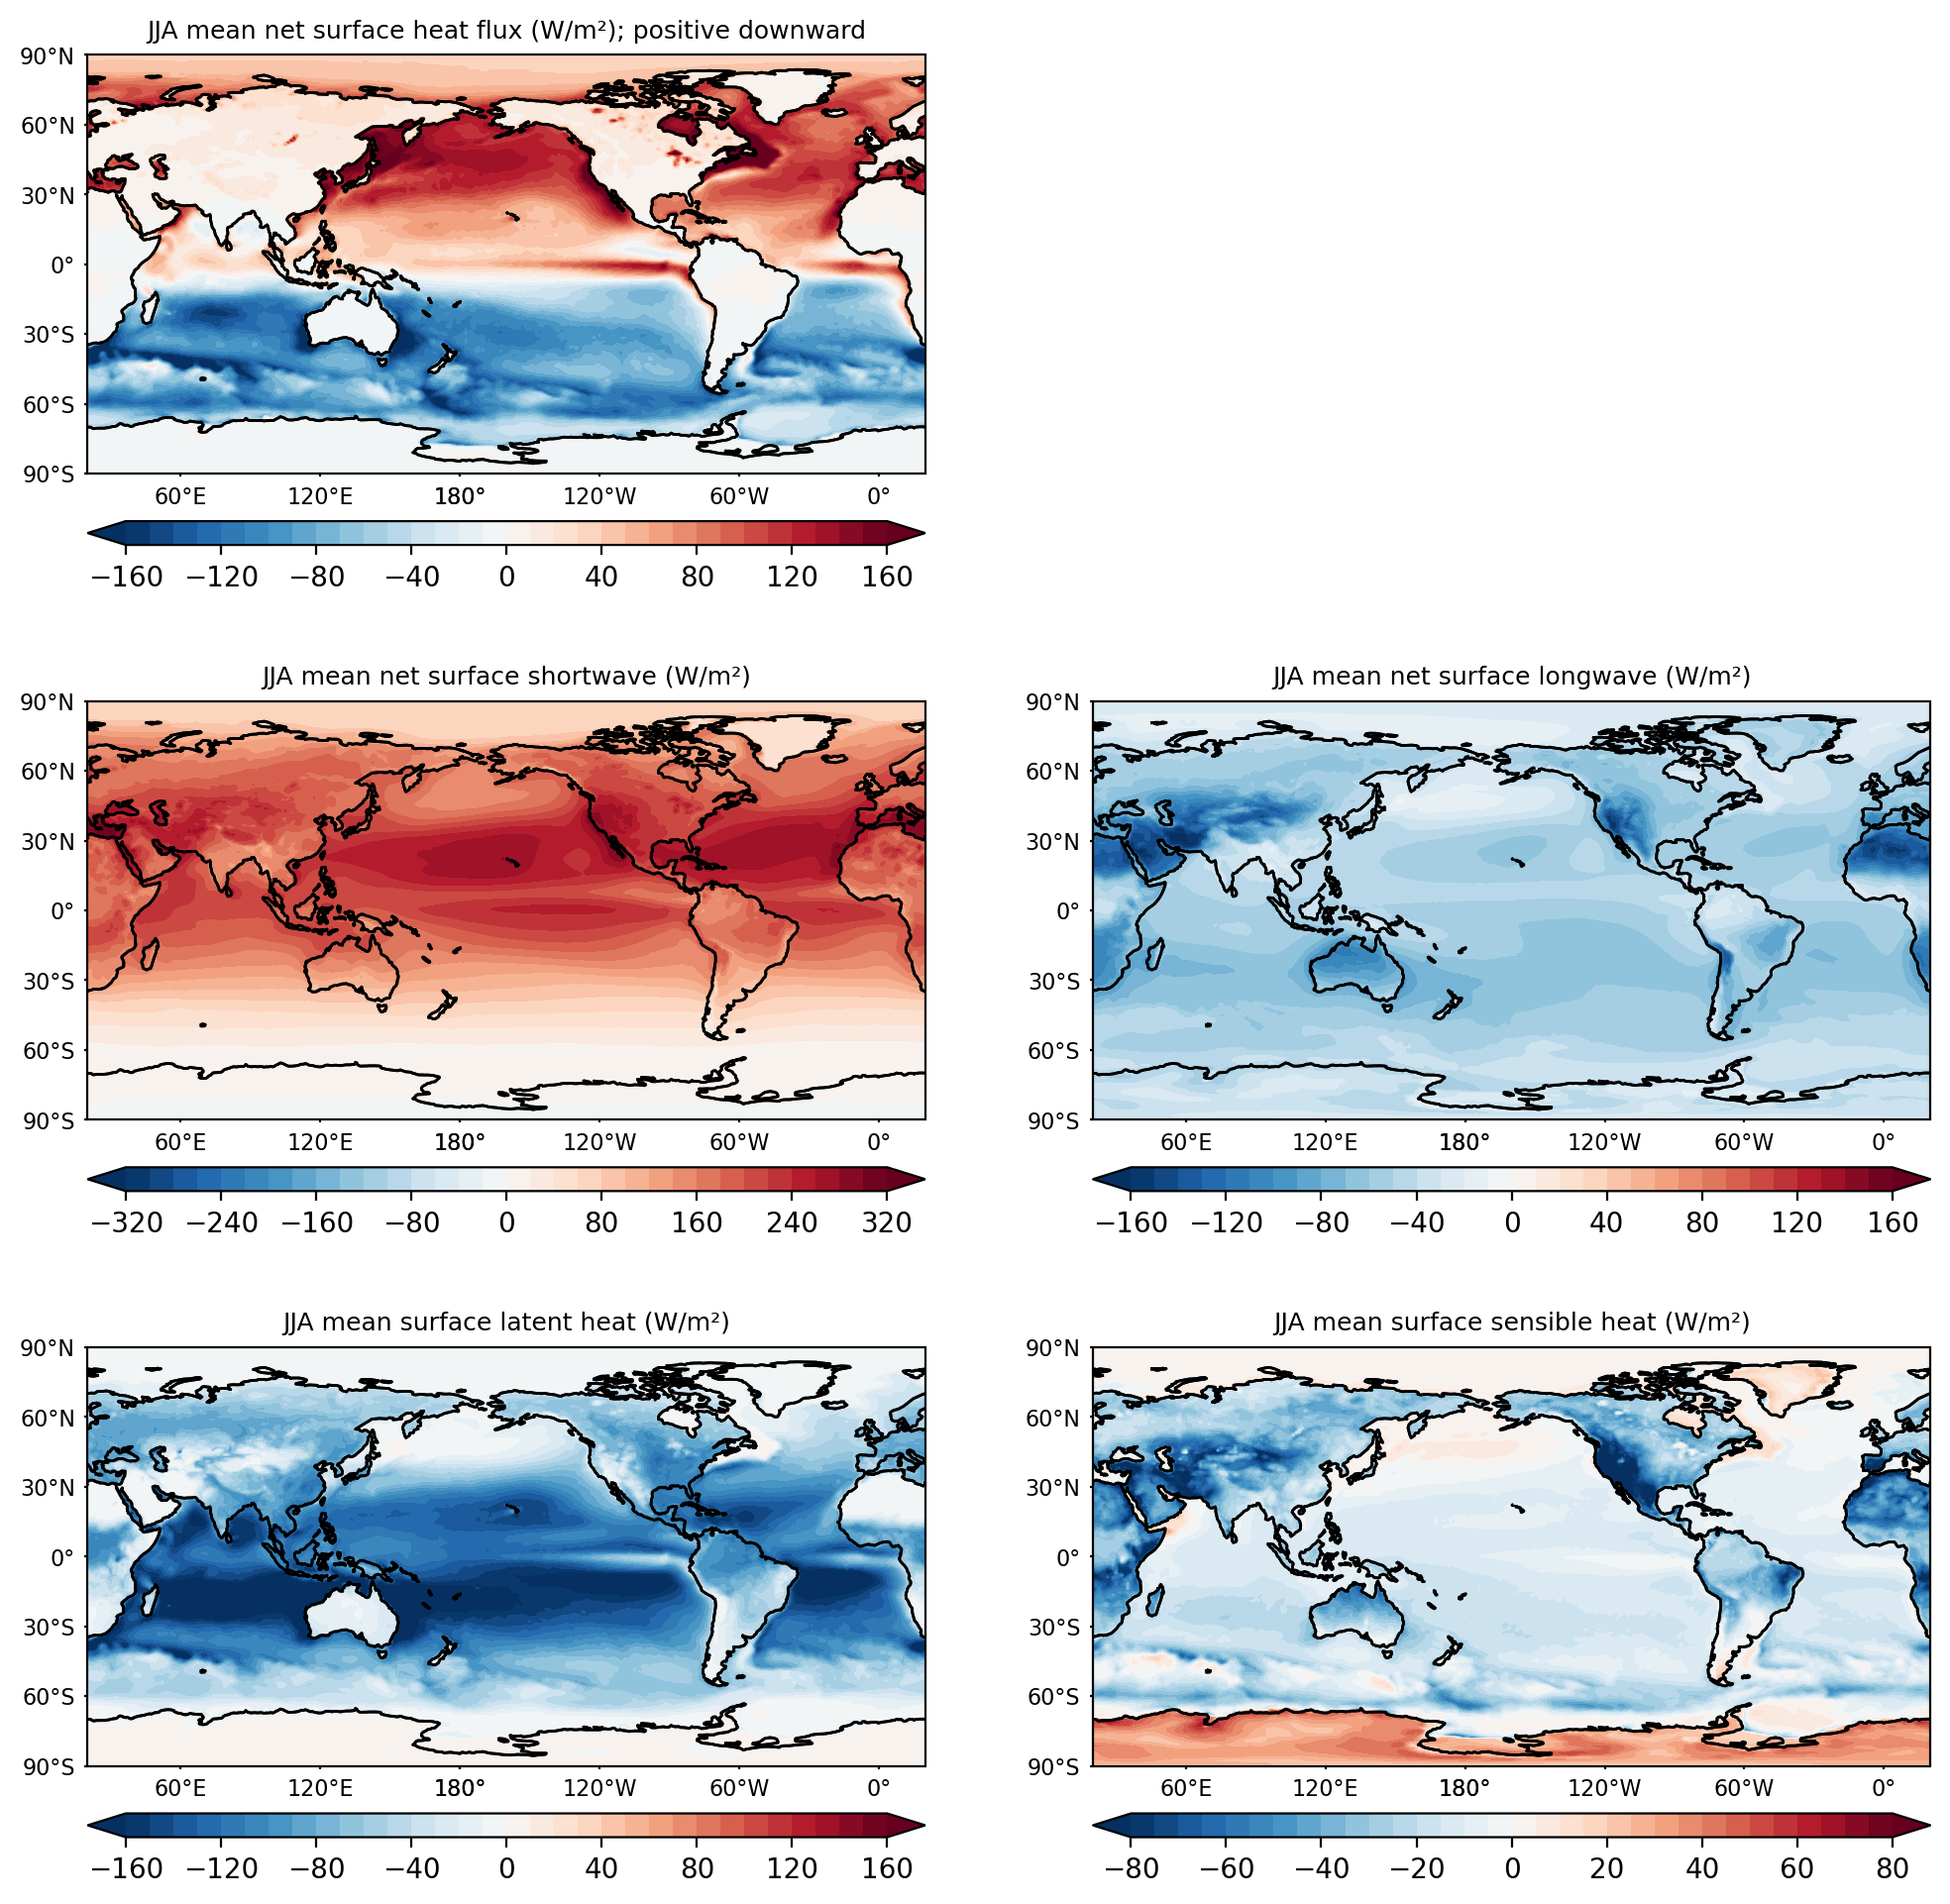

In [18]:
# Define color limits for each flux individually 
flux_limits = {
    "Qnet": (-160, 160, 10),
    "SW":   (-320, 320, 20),  
    "LW":   (-160, 160, 10),   
    "LE":   (-160, 160, 10),
    "SH":   (-80, 80, 5)
}

fig, axes = plt.subplots(
    3, 2, figsize=(12, 12),
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160)},
    dpi=200
)

axes_flat = axes.flatten()

# --- First row: Qnet ---
vmin, vmax, interval = flux_limits["Qnet"]
mappable = plot_flux(axes_flat[0], jja_mean_Qnet, vmin=vmin, vmax=vmax, contour_interval=interval)
axes_flat[0].set_title("JJA mean net surface heat flux (W/m²); positive downward", fontsize=9)

# Skip empty subplot
axes_flat[1].axis('off')

# --- Remaining rows: SW, LW, LE, SH ---
other_fluxes = [
    (jja_mean_sw, "SW", "JJA mean net surface shortwave (W/m²)"),
    (jja_mean_lw, "LW", "JJA mean net surface longwave (W/m²)"),
    (jja_mean_le, "LE", "JJA mean surface latent heat (W/m²)"),
    (jja_mean_sh, "SH", "JJA mean surface sensible heat (W/m²)")
]

for ax, (data, key, title) in zip(axes_flat[2:], other_fluxes):
    vmin, vmax, interval = flux_limits[key]
    mappable = plot_flux(ax, data, vmin=vmin, vmax=vmax, contour_interval=interval)
    ax.set_title(title, fontsize=9)

# --- Add horizontal colorbars for each panel ---
for ax, (data, key, title) in zip([axes_flat[0]] + axes_flat[2:].tolist(), 
                                  [(jja_mean_Qnet, "Qnet", "Qnet (W/m²)")] + other_fluxes):
    vmin, vmax, interval = flux_limits[key]
    mappable = plot_flux(ax, data, vmin=vmin, vmax=vmax, contour_interval=interval)
    
    # Position axes below the subplot
    pos = ax.get_position()
    cbar_ax = fig.add_axes([pos.x0, pos.y0 - 0.03, pos.width, 0.01])  # [left, bottom, width, height]
    fig.colorbar(mappable, cax=cbar_ax, orientation='horizontal')

plt.show()

## <span style="color:blue">Q3: DJF vs. JJA Climatological Surface Heat Fluxes (2 points in total)</span>

**Q3.1 Spatial Contrast (1 point)**  
Compare the spatial patterns of **SW, LW, LE, SH, and Qnet** between **DJF** and **JJA**.  
*Hint:* Identify latitude bands and ocean basins where each component strengthens or weakens (e.g., stronger downward SW over the summer hemisphere, enhanced upward LE over the winter hemisphere).

**Q3.2 Hemispheric Energy Balance (1 point)**  
Explain how the differences between **DJF** and **JJA** in each flux component contribute to the hemispheric **net surface heat balance (Qnet)**.  
*Hint:* Consider the seasonal migration of insolation, cloudiness, and evaporation; discuss where the surface acts as a net heat **source** vs. **sink** in each season.

## Example 4: Surface Heat Fluxes at Dallas, TX  

You have already completed **10 points** of questions in Q1–Q3.  
You are welcome to earn **an extra credit of 3 points** by working on Q4!  

In [19]:
dallas_lat = 32.7767
dallas_lon = -96.7970 + 360.

In [20]:
# Select the grid point nearest to Dallas
dallas_Qnet = Qnet.sel(lat=dallas_lat, lon=dallas_lon, method='nearest')
dallas_sw = sw.sel(lat=dallas_lat, lon=dallas_lon, method='nearest')
dallas_lw = lw.sel(lat=dallas_lat, lon=dallas_lon, method='nearest')
dallas_le = le.sel(lat=dallas_lat, lon=dallas_lon, method='nearest')
dallas_sh = sh.sel(lat=dallas_lat, lon=dallas_lon, method='nearest')

In [21]:
# Compute monthly climatology
dallas_Qnet_monclim = dallas_Qnet.groupby('time.month').mean('time')
dallas_sw_monclim = dallas_sw.groupby('time.month').mean('time')
dallas_lw_monclim = dallas_lw.groupby('time.month').mean('time')
dallas_le_monclim = dallas_le.groupby('time.month').mean('time')
dallas_sh_monclim = dallas_sh.groupby('time.month').mean('time')

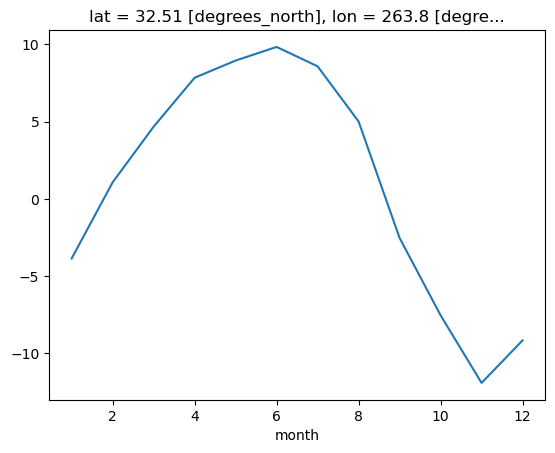

In [22]:
dallas_Qnet_monclim.plot()

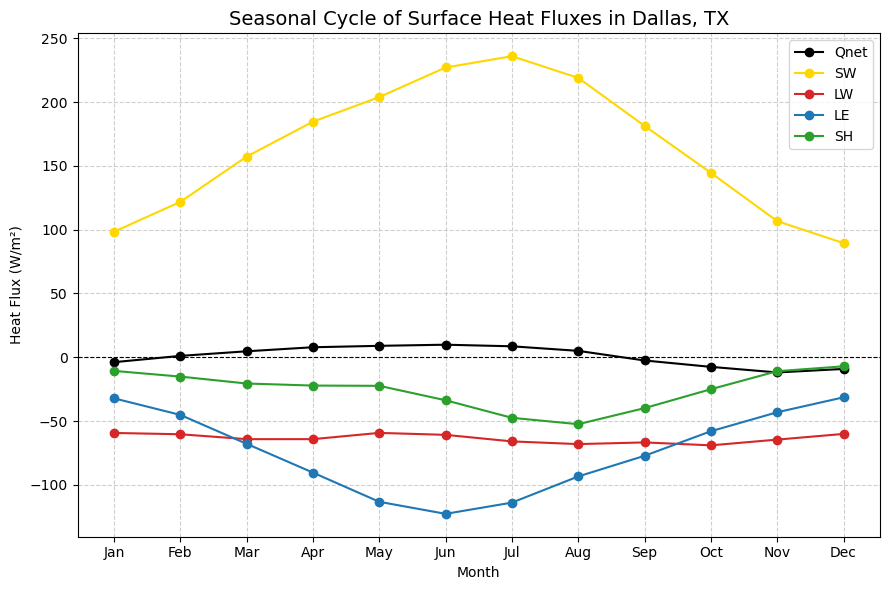

In [23]:
# Define colors for consistency (same scheme as global plots)
colors = {
    'Qnet': 'black',
    'SW': 'gold',
    'LW': 'tab:red',
    'LE': 'tab:blue',
    'SH': 'tab:green'
}

# Plot seasonal cycle of all flux components at Dallas
plt.figure(figsize=(9, 6))
plt.plot(dallas_Qnet_monclim['month'], dallas_Qnet_monclim, marker='o', color=colors['Qnet'], label='Qnet')
plt.plot(dallas_sw_monclim['month'], dallas_sw_monclim, marker='o', color=colors['SW'], label='SW')
plt.plot(dallas_lw_monclim['month'], dallas_lw_monclim, marker='o', color=colors['LW'], label='LW')
plt.plot(dallas_le_monclim['month'], dallas_le_monclim, marker='o', color=colors['LE'], label='LE')
plt.plot(dallas_sh_monclim['month'], dallas_sh_monclim, marker='o', color=colors['SH'], label='SH')

# X-axis as months
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Seasonal Cycle of Surface Heat Fluxes in Dallas, TX', fontsize=14)
plt.ylabel('Heat Flux (W/m²)')
plt.xlabel('Month')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## <span style="color:blue">Q4: Interpret the Surface Energy Balance at Dallas (land) vs. a Tropical Ocean Region (Extra 3 points) </span>

**Q4.1 (1 point)**  
Interpret the seasonal cycle of surface heat fluxes at Dallas, TX.  
*Hint:* Consider the role of radiation, latent heat, and sensible heat over land.  

**Q4.2 (2 point)**  
Repeat the same analysis for a tropical ocean location (e.g., central Pacific). Compare and contrast with Dallas.  